<a href="https://colab.research.google.com/github/zwzzhong/Amazon_Fine_Food_Reviews/blob/master/Surprise_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Fine Food Reviews**

## **Injest**

**Import packages**

In [0]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Read data from Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Overview the data**

In [0]:
df = pd.read_csv('/content/drive/My Drive/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
df.shape

(568454, 10)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


**Select columns needed**

In [0]:
df = df.loc[:, ['ProductId','UserId', 'Score','Time']]
df.head()

,ProductId,UserId,Score,Time
0,B001E4KFG0,A3SGXH7AUHU8GW,5,1303862400
1,B00813GRG4,A1D87F6ZCVE5NK,1,1346976000
2,B000LQOCH0,ABXLMWJIXXAIN,4,1219017600
3,B000UA0QIQ,A395BORC6FGVXV,2,1307923200
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,1350777600


## **EDA**

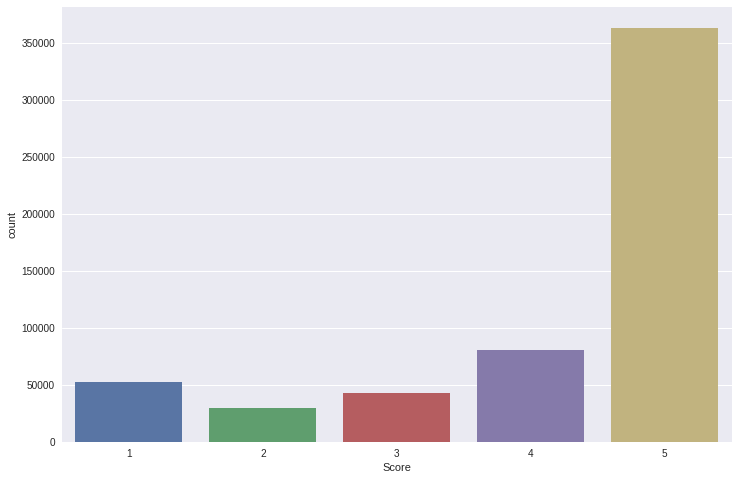

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(df['Score'])

## **Modeling**

**Install Surprise**

In [0]:
!pip install scikit-surprise

In [0]:
from surprise import SVD
from surprise import evaluate
from surprise import SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import BaselineOnly
from surprise import Reader
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

**Read data from Pandas DataFrame**

In [0]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserId', 'ProductId', 'Score']], reader)

**Train test data spliting**

In [0]:
data.split(n_folds=3)
trainset, testset = train_test_split(data, test_size=.2)

**Modeling with SVD**

In [0]:
algo = SVD()
algo.fit(trainset)
test_pred = algo.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD : Test Set
RMSE: 1.0806


1.0805865229440104

**Evaluating the model**

In [0]:
cross_validate(SVD(), data, cv=2)

{'fit_time': (26.38085103034973, 26.270192623138428),
 'test_mae': array([0.87134849, 0.87158552]),
 'test_rmse': array([1.15095624, 1.14989384]),
 'test_time': (3.0734434127807617, 3.071427345275879)}

In [0]:
evaluate(SVD(), data, measures=['RMSE', 'MAE'])

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.1097
MAE:  0.8224
------------
Fold 2
RMSE: 1.1119
MAE:  0.8251
------------
Fold 3
RMSE: 1.1086
MAE:  0.8231
------------
------------
Mean RMSE: 1.1101
Mean MAE : 0.8235
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.8223707359051504,
                             0.8250688637056504,
                             0.8231223113432115],
                            'rmse': [1.1097393322655769,
                             1.111910495422881,
                             1.1085528259659738]})

**Prediction**

In [0]:
algo.predict(uid = 'ABXLMWJIXXAIN', iid='B001E4KFG0')

Prediction(uid='ABXLMWJIXXAIN', iid='B001E4KFG0', r_ui=None, est=4.393828199694672, details={'was_impossible': False})